In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
np.random.beta(5,10, 10)

array([0.34007561, 0.57819411, 0.46068543, 0.22164872, 0.41536551,
       0.17510432, 0.19723421, 0.16960485, 0.25991719, 0.36616082])

In [4]:
def reward(i):
    return np.random.beta(5,5*i, 10)

In [5]:
class Bandits:
    def __init__(self):
        self.rewards= [0 for i in range(10)]
        self.count=[0 for i in range(10)]
    
    def update(self, bandit, reward):
        self.rewards[bandit]+=reward
        self.count[bandit]+=1
        
    def full_upd(self,rewardvect=[0,0,0,0,0,0,0,0,0,0]):
        for bandit in range(10):
            self.rewards[bandit]+=rewardvect[bandit]
            self.count[bandit]+=1
            
        
    def get_rewards(self):
        return self.rewards
    
    def get_count(self):
        return self.count        
        
    def getval(self):
        values=[self.rewards[i]/self.count[i] for i in range(10) ]
        return values
        

In [6]:
def ETC(n):
    def reward(i):
        return np.random.beta(5,5*(i+1), 10) #index 0 corresponds to 1
    
    bandits_known=Bandits()
    bandits_full=Bandits()
    i=0
    chosen=0
    rewardsum=0
    best_regret=0
    reglist=[0]
    
    for t in range(n):
        if t<10:
            rewardt=reward(i)
            rewardsum+=rewardt[i]
            bandits_known.update(i,rewardt[i])
            bandits_full.full_upd(rewardt)
            best_regret=np.amax(bandits_full.get_rewards()) #[np.argmax(rewardt)]
            reglist.append(best_regret-rewardsum)
            i+=1
        elif t==10: 
            chosen= np.argmax(bandits_known.getval())
            #_________________
            rewardt=reward(chosen)
            rewardsum+=rewardt[chosen]
            bandits_known.update(chosen,rewardt[chosen])
            bandits_full.full_upd(rewardt)
            best_regret=np.amax(bandits_full.get_rewards()) #[np.argmax(rewardt)]
            reglist.append(best_regret-rewardsum)
            
        else:
            rewardt=reward(chosen)
            rewardsum+=rewardt[chosen]
            bandits_known.update(chosen,rewardt[chosen])
            bandits_full.full_upd(rewardt)
            best_regret=np.amax(bandits_full.get_rewards()) #[np.argmax(rewardt)]
            reglist.append(best_regret-rewardsum)
            
    return(reglist)
#     return best_regret - rewardsum
    
        
            
        
    
    

In [7]:
ETC(200)

[0,
 0.19711397197323777,
 0.44051802674471185,
 0.6326063066905817,
 0.6326063066905818,
 0.6267299119296654,
 0.592146545786538,
 0.6199914678597174,
 0.8056995950684525,
 0.7921149996043675,
 0.8420338906330302,
 0.7364035865239447,
 0.1700482039215543,
 0.12566855094316587,
 0.12566855094316587,
 0.12566855094316587,
 0.12566855094316587,
 0.22675561002601796,
 0.42367290412783554,
 0.6946689176039076,
 0.6715188071726672,
 0.6428914275733488,
 0.6380660718674918,
 0.7099365525746784,
 0.7154767024248532,
 0.8653880674911534,
 1.3265068269620048,
 1.3274859230865115,
 1.540189692947152,
 1.44927422585185,
 1.4065513043943039,
 1.357932059150576,
 1.5858001627850165,
 1.6459109001924066,
 1.6504855247143215,
 1.6733596432292384,
 1.4014181066193494,
 1.3685905157123113,
 1.1622320547704916,
 0.8101064434190413,
 0.7854696063832165,
 1.0595531192303653,
 1.4328107832566488,
 1.4030065942541654,
 1.5476160495866473,
 1.3371330608117482,
 1.2917911393587538,
 1.3688156412909187,
 1.329

In [8]:
class newBandits:
    def __init__(self):
        self.rewards= [0 for i in range(10)]
        self.count=[0 for i in range(10)]
        self.measure=[0 for i in range(10)]
    
    def update(self, bandit, reward):
        self.rewards[bandit]+=reward
        self.count[bandit]+=1
        n=self.count[bandit]
        new_measure=((n-1)/float(n))*self.measure[bandit]+(1/float(n))*reward
        self.measure[bandit]=new_measure
        
        
    def full_upd(self,rewardvect=[0,0,0,0,0,0,0,0,0,0]):
        for bandit in range(10):
            self.update(bandit,rewardvect[bandit])
            
        
    def get_rewards(self):
        return self.rewards
    
    def get_count(self):
        return self.count        
        
    def getval(self):
#         values=[self.measure[i] for i in range(10) ]
        return self.measure
        

In [9]:
def Epsilongreedy(n,epsilon):
    def reward(i):
        return np.random.beta(5,5*(i+1), 10) #index 0 corresponds to 1
    
    bandits_known=newBandits()
    bandits_full=newBandits()
    i=0
    chosen=0
    rewardsum=0
    best_regret=0
    reglist=[0]
    
    for t in range(n):
        if np.random.random()<=epsilon:
            chosen=np.argmax(bandits_known.getval())
            rewardt=reward(chosen)
            rewardsum+=rewardt[chosen]
            bandits_known.update(chosen,rewardt[chosen])
            bandits_full.full_upd(rewardt)
            best_regret=np.amax(bandits_full.get_rewards()) #[np.argmax(rewardt)]
            reglist.append(best_regret-rewardsum)
            
        else:
            i=int(np.random.random()*10)
            rewardt=reward(i)
            rewardsum+=rewardt[i]
            bandits_known.update(i,rewardt[i])
            bandits_full.full_upd(rewardt)
            best_regret=np.amax(bandits_full.get_rewards()) #[np.argmax(rewardt)]
            reglist.append(best_regret-rewardsum)
                       
#     print(reglist)
    return reglist

In [10]:
Epsilongreedy(200,0.0)[200]

0.43997061330310316

In [11]:
class exp3Bandits:
    def __init__(self):
        self.rewards= [0 for i in range(10)]
        self.count=[0 for i in range(10)]
        self.weights=[1 for i in range(10)]
        self.probab=[0.1 for i in range(10)]
        
    def makeprobab(self):
        wt=sum(self.weights)
        for i in range(10):
            self.probab[i]= self.weights[i]/wt    
    
    def update(self, bandit, reward,eta):
        self.rewards[bandit]+=reward
        self.count[bandit]+=1
        n=self.count[bandit]
        eta=0.057 #eta calcluated using class formula
        self.weights[bandit]=self.weights[bandit]*np.exp(+eta*reward)
        
        
    def full_upd(self,rewardvect=[0,0,0,0,0,0,0,0,0,0],eta=0.057):
        for bandit in range(10):
            self.update(bandit,rewardvect[bandit],eta)
            
        
    def get_rewards(self):
        return self.rewards
    
    def get_count(self):
        return self.count        
        
    def getwt(self):
        return self.weights
    
    def getprobab(self):
        return self.probab

In [12]:
def EXP3(n,eta=0.057):
    def reward(i):
        return np.random.beta(5,5*(i+1), 10) #index 0 corresponds to 1
    
    def wheel(probablist):
        breaker=np.random.random()
        i=0
        sump=0
        while i<10:
            sump+=probablist[i]
            if sump>=breaker:
                return i
            i=i+1
        return i
            
    
    bandits_known=exp3Bandits()
    bandits_full=newBandits()
    i=0
    chosen=0
    rewardsum=0
    best_regret=0
    reglist=[0]
    
    for t in range(n):
        bandits_known.makeprobab()
        
        chosen=wheel(bandits_known.getprobab())
        rewardt=reward(chosen)
        rewardsum+=rewardt[chosen]
        bandits_known.update(chosen,rewardt[chosen],eta)
        bandits_full.full_upd(rewardt)
        best_regret=np.amax(bandits_full.get_rewards()) #[np.argmax(rewardt)]
        reglist.append(best_regret-rewardsum)
                       
#     print(reglist)
    return(reglist)
#     return best_regret - rewardsum


In [13]:
EXP3(200)

[0,
 0.0,
 0.033371461328625784,
 0.033371461328625784,
 0.24435542973790314,
 0.3580435289654278,
 0.3580435289654278,
 0.34901286874102877,
 0.4893138512961539,
 0.6059934466337342,
 0.5649328423114486,
 0.5877108566301781,
 0.6368209572276733,
 0.6244268409956224,
 0.7544554286855925,
 0.6103760213283049,
 0.8581540046387994,
 0.9421152137145765,
 0.817456038681116,
 0.9978584086933227,
 1.1691547411068237,
 1.1912019139703092,
 1.2399116255774936,
 1.1375856206806043,
 1.0500579990642889,
 1.1583848992786314,
 1.1524329591118891,
 1.1704804171354763,
 1.1671557991480421,
 1.1795979901401656,
 1.2762106866593852,
 1.217036386122337,
 1.149507933550396,
 1.0802436895837921,
 1.0802436895837921,
 1.0994792323932945,
 1.0215559832224814,
 0.9875471431211515,
 1.172659763687773,
 1.1654751455052166,
 1.2745948843705879,
 1.3090283719376075,
 1.2743274527004722,
 1.3101960491845137,
 1.2537271253365105,
 1.273037472791466,
 1.25609318135783,
 1.0307806978876757,
 1.0853663459463325,
 1.1

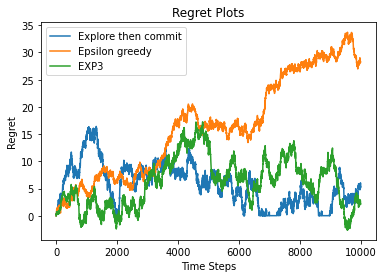

In [46]:
plt.title("Regret Plots")
p1=ETC(10000)
p2=Epsilongreedy(10000,0.2)
p3=EXP3(10000,0.02)
plt.plot(p1, label='Explore then commit')
plt.plot(p2, label='Epsilon greedy')
plt.plot(p3, label='EXP3')

plt.xlabel('Time Steps')
plt.ylabel('Regret')

plt.legend(loc='best')
plt.show()

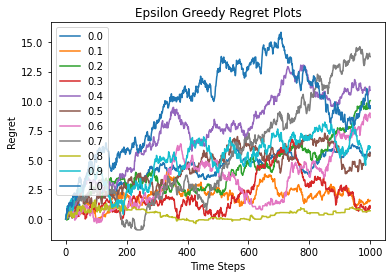

In [15]:
for i in range(11):
    plt.plot(Epsilongreedy(1000,i/10),label=str(i/10))
# plt.show()
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title("Epsilon Greedy Regret Plots")
plt.legend(loc='best')
plt.show()

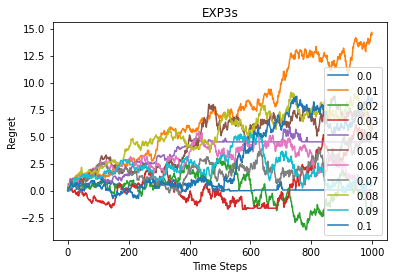

In [16]:
for i in range(11):
    plt.plot(EXP3(1000,i/100),label=str(i/100))
# plt.show()
plt.xlabel('Time Steps')
plt.ylabel('Regret')
plt.title("EXP3s")
plt.legend(loc='best')
plt.show()